<a href="https://colab.research.google.com/github/quarantinecoding/lockdownfinance/blob/master/HG_lab_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
masterdata=pd.read_csv("drive/My Drive/Colab Notebooks/data/sample_prices.csv")

In [0]:
returns=masterdata.pct_change()

## Variance - from first principles (incorrect as mean not adjusted)

In [0]:
sumofsquares=((returns-returns.mean())**2).agg("sum")

In [5]:
sumofsquares/returns.count()

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [6]:
((returns-returns.mean())**2).mean()

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [7]:
print((sumofsquares/returns.count())**0.5)

BLUE      0.022957
ORANGE    0.076212
dtype: float64


##Variance in Single line (incorrect as mean not adjusted)


In [0]:
variance=(((returns-returns.mean())**2).mean())**0.5

In [9]:
print(variance)

BLUE      0.022957
ORANGE    0.076212
dtype: float64


## Variance (mean adjusted)

In [10]:
(sumofsquares/(returns.dropna().shape[0]-1))**0.5

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [11]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

## Imported market data

In [0]:
portfoliodata=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Portfolios_Formed_on_ME_monthly_EW.csv",index_col=0)

In [16]:
portfoliodata.shape

(1110, 19)

In [17]:
portfoliodata.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [18]:
portfoliodata.columns

Index(['<= 0', 'Lo 30', 'Med 40', 'Hi 30', 'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4',
       'Hi 20', 'Lo 10', 'Dec 2', 'Dec 3', 'Dec 4', 'Dec 5', 'Dec 6', 'Dec 7',
       'Dec 8', 'Dec 9', 'Hi 10'],
      dtype='object')

In [0]:
portfolio_var=portfoliodata.std()

In [30]:
portfolio_var

<= 0      1.762940e-12
Lo 30     9.121026e+00
Med 40    7.066472e+00
Hi 30     5.815717e+00
Lo 20     9.719729e+00
Qnt 2     7.928957e+00
Qnt 3     7.048299e+00
Qnt 4     6.393745e+00
Hi 20     5.632515e+00
Lo 10     1.062882e+01
Dec 2     9.117535e+00
Dec 3     8.192778e+00
Dec 4     7.723223e+00
Dec 5     7.212501e+00
Dec 6     6.932748e+00
Dec 7     6.592381e+00
Dec 8     6.262746e+00
Dec 9     5.953184e+00
Hi 10     5.390026e+00
dtype: float64

In [27]:
(((portfoliodata-portfoliodata.mean())**2).sum()/(portfoliodata.shape[0]-1))**0.5

<= 0      1.762940e-12
Lo 30     9.121026e+00
Med 40    7.066472e+00
Hi 30     5.815717e+00
Lo 20     9.719729e+00
Qnt 2     7.928957e+00
Qnt 3     7.048299e+00
Qnt 4     6.393745e+00
Hi 20     5.632515e+00
Lo 10     1.062882e+01
Dec 2     9.117535e+00
Dec 3     8.192778e+00
Dec 4     7.723223e+00
Dec 5     7.212501e+00
Dec 6     6.932748e+00
Dec 7     6.592381e+00
Dec 8     6.262746e+00
Dec 9     5.953184e+00
Hi 10     5.390026e+00
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


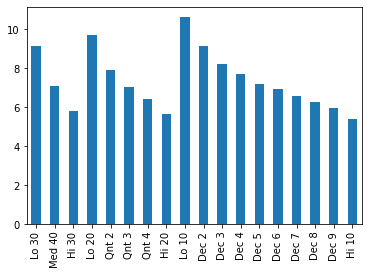

In [39]:
portfolio_var[1:].plot("bar")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


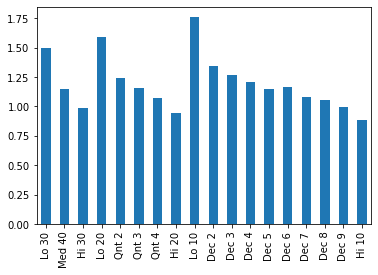

In [36]:
portfoliodata.mean()[1:].plot("bar")

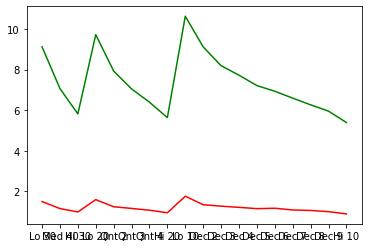

In [43]:
import matplotlib.pyplot as plt

plt.plot(portfoliodata.mean()[1:],"red")
plt.plot(portfolio_var[1:],"green")

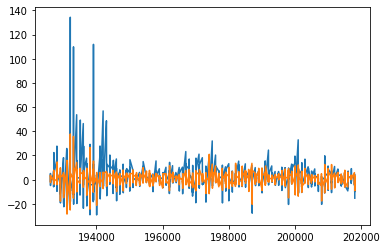

In [47]:
plt.plot(portfoliodata[["Lo 10","Hi 10"]])

## Annualized Standard deviation and Annualized Return

In [0]:
largeandsmallcaps=portfoliodata[["Lo 10","Hi 10"]]

In [64]:
## KEY FORMULA - Annualized standard deviation
annualized_var=largeandsmallcaps.std()*(12**0.5)
print(annualized_var)

Lo 10    36.819305
Hi 10    18.671599
dtype: float64


In [66]:
## KEY FORMULA - Long term Annualized returns from monthly data
annualized_return=(((1+largeandsmallcaps/100).prod())**(12/largeandsmallcaps.shape[0])-1)*100
print(annualized_return)

Lo 10    16.746329
Hi 10     9.280968
dtype: float64


## Return on Risk ratio & Sharpe Ratio

In [67]:
print(annualized_return/annualized_var)
print((annualized_return-3)/annualized_var)

Lo 10    0.454825
Hi 10    0.497063
dtype: float64
Lo 10    0.373346
Hi 10    0.336392
dtype: float64
